In [3]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [6]:
data = pd.read_csv("loandata.csv")
data.head(8)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N


In [7]:
data["Loan_Status"] = data["Loan_Status"].apply(lambda x:1 if x=="Y" else 0)
data["Gender"] = data["Gender"].apply(lambda x:1 if x=="Female" else 0)
data["Married"] = data["Married"].apply(lambda x:1 if x=="Yes" else 0)
data["Education"] = data["Education"].apply(lambda x:1 if x=="Graduate" else 0)
data["Self_Employed"] = data["Self_Employed"].apply(lambda x:1 if x=="Yes" else 0)
dictionary = {"Rural":1, "Semiurban":2, "Urban":3}
data["Property_Area"] = data["Property_Area"].map(dictionary)
dictio = {"0":0, "1":1, "2":2, "3+":3}
data["Dependents"] = data["Dependents"].map(dictio)

# change the null value with the median value
data.Gender.fillna(data["Gender"].median(), inplace=True)
data.Married.fillna(data["Married"].median(), inplace=True)
data.Dependents.fillna(data["Dependents"].median(), inplace=True)
data.Education.fillna(data["Education"].median(), inplace=True)
data.Self_Employed.fillna(data["Self_Employed"].median(), inplace=True)
data.ApplicantIncome.fillna(data["ApplicantIncome"].median(), inplace=True)
data.CoapplicantIncome.fillna(data["CoapplicantIncome"].median(), inplace=True)
data.LoanAmount.fillna(data["LoanAmount"].median(), inplace=True)
data.Loan_Amount_Term.fillna(data["Loan_Amount_Term"].median(), inplace=True)
data.Credit_History.fillna(data["Credit_History"].median(), inplace=True)
data.Property_Area.fillna(data["Property_Area"].median(), inplace=True)
data.Loan_Status.fillna(data["Loan_Status"].median(), inplace=True)

outcome = np.array(data["Loan_Status"])
data = data.drop("Loan_Status", axis=1)
data = data.drop("Loan_ID", axis=1)
data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0.0,1,0,5849,0.0,128.0,360.0,1.0,3
1,0,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,1
2,0,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,3
3,0,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,3
4,0,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,3


In [8]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

In [9]:
lis = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_transformed)
    lis.append(kmeans.inertia_)

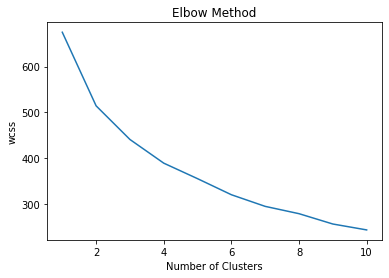

In [10]:
plt.plot(range(1, 11), lis)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show()

In [22]:
kmeans = KMeans(n_clusters=7, init="k-means++", max_iter=300, n_init=10, random_state=0).fit(data_transformed)
data["Cluster"] = kmeans.labels_+1

In [23]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Cluster,Loan_Status
0,0,0,0.0,1,0,5849,0.0,128.0,360.0,1.0,3,5,1
1,0,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,1,2,0
2,0,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,3,6,1
3,0,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,3,4,1
4,0,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,3,5,1


In [24]:
data["Loan_Status"] = outcome
data["Loan_Status"].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [25]:
data.groupby(["Cluster"]).size()

Cluster
1     60
2    214
3     88
4     60
5    100
6     47
7     45
dtype: int64

In [26]:
data.groupby(["Cluster"]).Loan_Status.value_counts()

Cluster  Loan_Status
1        0               55
         1                5
2        1              178
         0               36
3        1               60
         0               28
4        1               47
         0               13
5        1               64
         0               36
6        1               40
         0                7
7        1               28
         0               17
Name: Loan_Status, dtype: int64